In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy

In [16]:
def plot_solution(solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, 8))
    ax.set_ylim((0, 8))

    count = 0
    for queen in solution:
        ax.add_patch(plt.Rectangle((queen, count), 1, 1))
        count += 1
    plt.show(fig)

In [184]:
def isSafe(board, row, col, N=8):
    queens = list(zip(board, range(N)))
    
    for i in range(col):
        if (row, i) in queens:
            return False
  
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if (i, j) in queens:
            return False
  
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if (i, j) in queens:
            return False
  
    return True

In [190]:
def objectiveFunction(solution):
    scoreSum = 0
    for no, queen in enumerate(solution):
        if isSafe(solution, no, queen): scoreSum += 1
    return scoreSum

In [191]:
def GetRandomChromosome(n):
    chromosome = np.random.permutation(np.arange(n))
    distance = objectiveFunction(chromosome)
    return [chromosome, distance]

In [192]:
def getPopulation(n = 1):
    return [GetRandomChromosome() for _ in range(n)] # O(n)

Score: 2


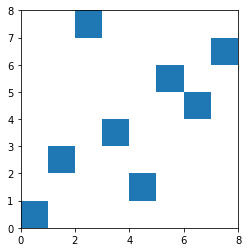

In [208]:
x = GetRandomChromosome(8)
print("Score:", x[1])
plot_solution(x[0])

In [ ]:
def TournamentSelection(population, k=2):
    community = random.sample(population, k)
    localElite = population[0]
    
    for chromosome in community:
        if chromosome[1] < localElite[1]:
            localElite = chromosome
            
    return localElite

In [ ]:
def getElite(A, B):
    if A is None: return B
    if B is None: return A
    
    if distA < distB:
        print('New Best')
        return A
    else:
        return B

In [ ]:
def geneticAlgorithm(nCities, N, G, Pr, Pm):
    eliteIndividual = None

    fatherPopulation = getPopulation(N) # First Gen
    sonPopulation = []

    actualGeneration = 0

    while actualGeneration < G: # OR we haven't found a good solution
        
        for _ in range(100):
            G11 = TournamentSelection(fatherPopulation)
            G12 = TournamentSelection(fatherPopulation)

            #G21 = pointCrossover(G11, G12, Pr, nCities, node_names, distance_matrix, node_position_dict)
            
            #swapMutation(G21, Pr, nCities, node_names, distance_matrix, node_position_dict)

            #sonPopulation.append(G21)
            
            eliteIndividual = getElite(G21, eliteIndividual)

        for x in sonPopulation:
            if x[1] == -1: print("-1")
        
        fatherPopulation = sonPopulation
        sonPopulation = []

        actualGeneration += 1
    
    return eliteIndividual